The total number of significant p values is 299
After Bonferroni correction, The total number of new significant p values is 209


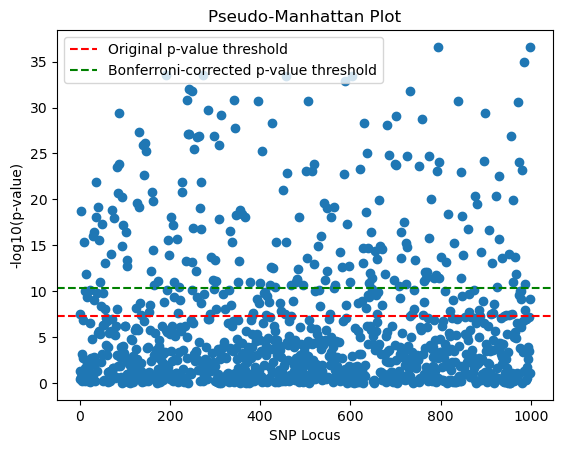

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt

df = pd.read_csv('1002142811.csv')

eff_pval = 5E-8 
#effective p-value
bcr_pval = 5E-11
#bonferroni corrected p-value

p_values = []
for i, row in df.iterrows():
    oddsratio, pvalue = fisher_exact([[row['Case_Num_C_Allele'], row['Case_Num_T_Allele']], [row['Control_Num_C_Allele'], row['Control_Num_T_Allele']]])
    p_values.append(pvalue)

df['p_value'] = p_values
df['significant_eff_val'] = df['p_value'] < eff_pval
df['significant_bcr_val'] = df['p_value'] < bcr_pval
df.to_csv('results.csv', index=False, columns=['SNP', 'p_value', 'significant_eff_val', 'significant_bcr_val'])


df['-log10p'] = -1 * np.log10(df['p_value'])
plt.scatter(df.index, df['-log10p'])

print("The total number of significant p values is {}".format(df['significant_eff_val'].sum()))
print("After Bonferroni correction, The total number of new significant p values is {}".format(df['significant_bcr_val'].sum()))
    
plt.axhline(-1 * np.log10(eff_pval), color='red', linestyle='--', label='Original p-value threshold')
plt.axhline(-1 * np.log10(bcr_pval), color='green', linestyle='--', label='Bonferroni-corrected p-value threshold')
plt.legend()
plt.xlabel('SNP Locus')
plt.ylabel('-log10(p-value)')
plt.title('Pseudo-Manhattan Plot')
plt.show()